# Support Vector Machine (SVM)
Imagine you’re a teacher, and you have a playground with kids from two groups: kids wearing red shirts and kids wearing blue shirts. Your goal is to draw a line on the ground to separate the two groups so they don’t mix.

Now, there are many ways to draw the line, but you want the best line. The best line is the one that keeps the groups as far apart as possible, with the largest space (or margin) between the closest kids from each group.

Support Vector Machine (SVM) in simple terms:
The line: SVM tries to find the "best line" (or boundary) to separate the groups.
Margin: The distance between the line and the closest points from each group is called the margin. SVM makes this margin as wide as possible to ensure the separation is strong.
Support Vectors: The closest points from each group to the line are called support vectors. They "support" the line and help define its position.
Key idea:
SVM finds the most balanced way to separate groups, even if the data isn’t perfectly separated. For trickier cases, it can also use "magic math" (kernels) to handle more complex shapes in higher dimensions!

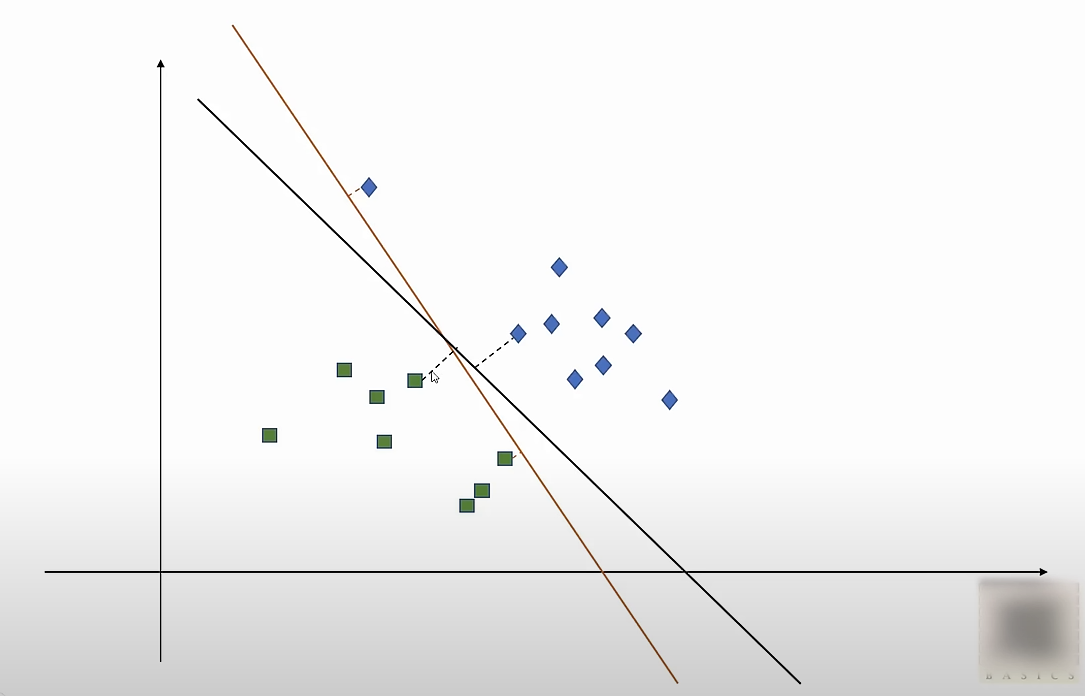
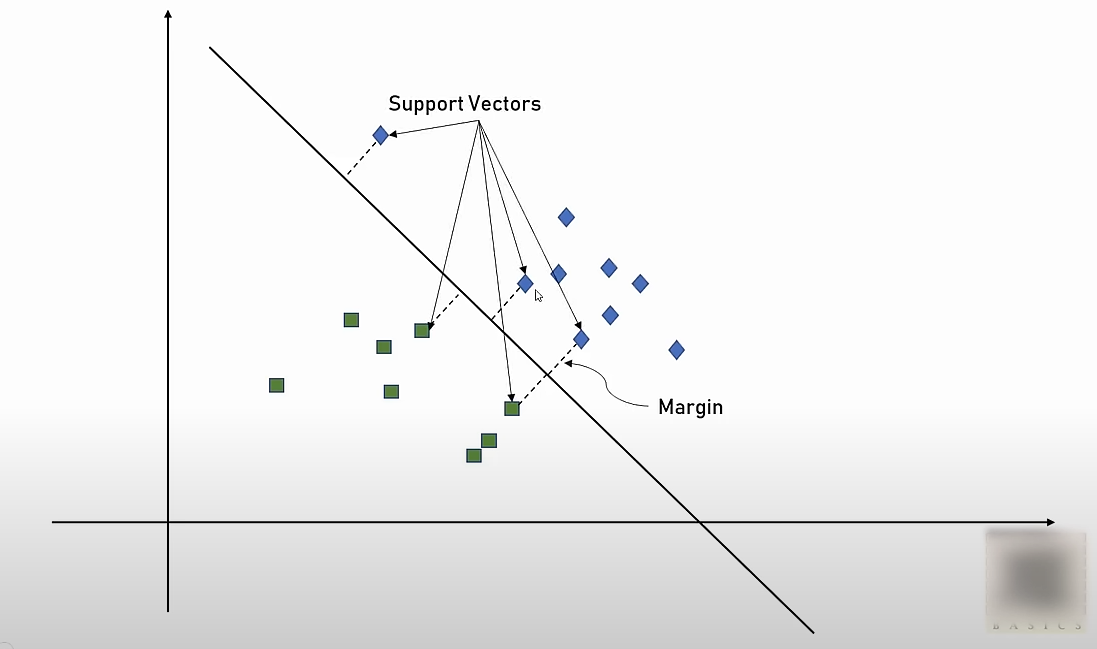

In 2d the boundty is a line in 3d its a plane what will you have in nD?
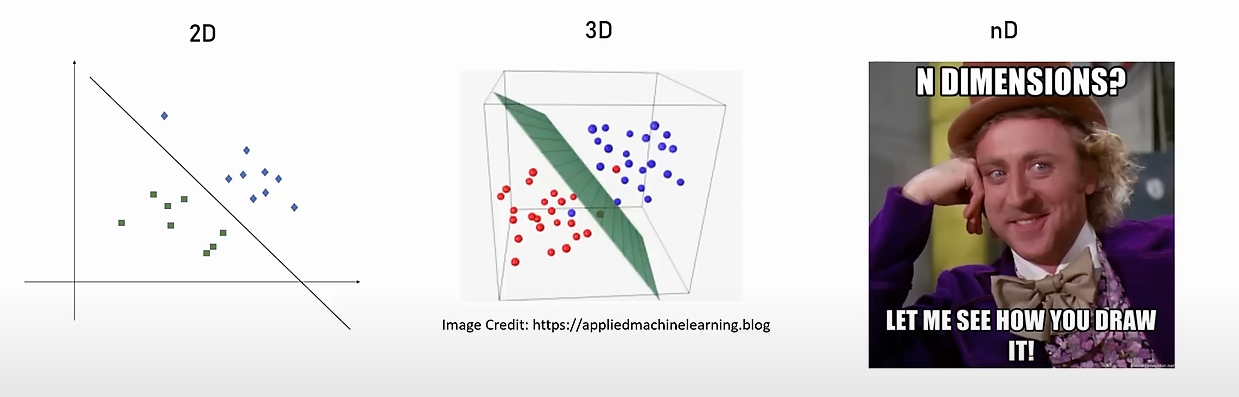

nD boundy is called hyperplane its theoritically possible only

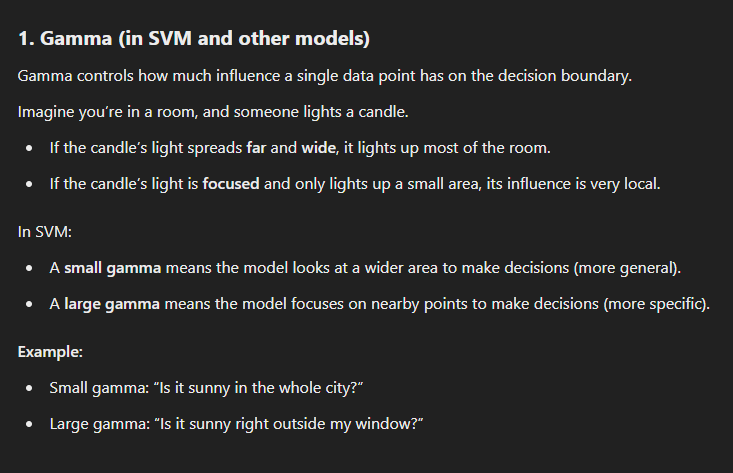

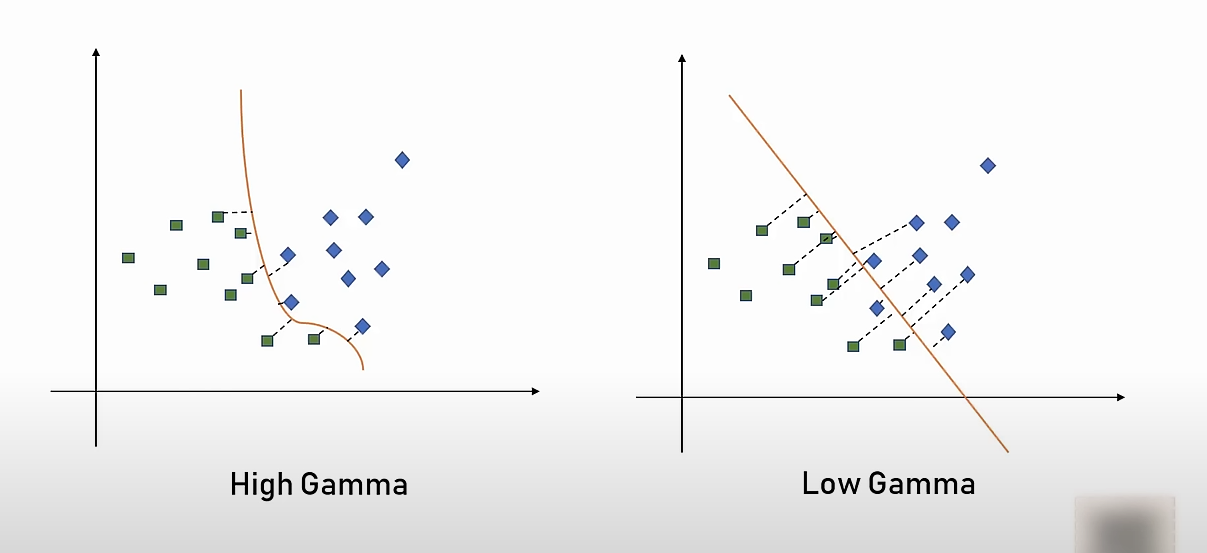
sometimes you will relate the accuracy in the low gamma model but <br>
high gamma and low gamma both the approaches are right it just depends upon you situation
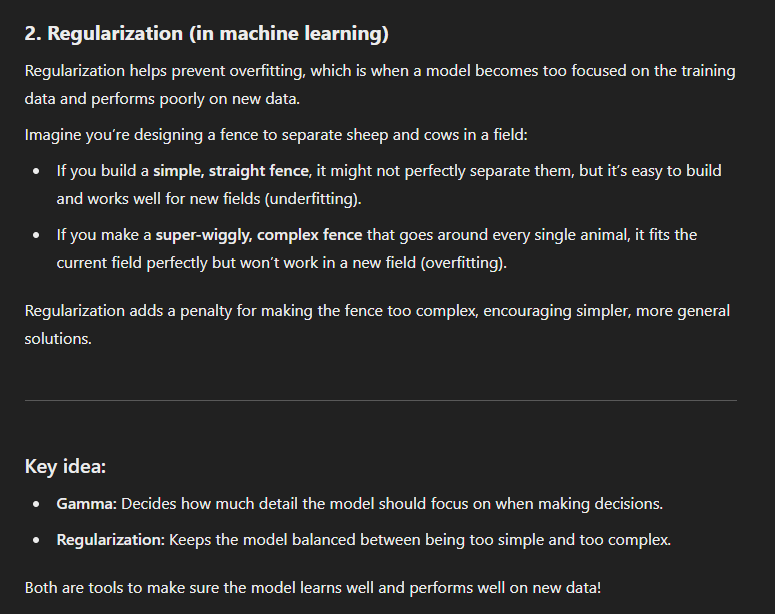
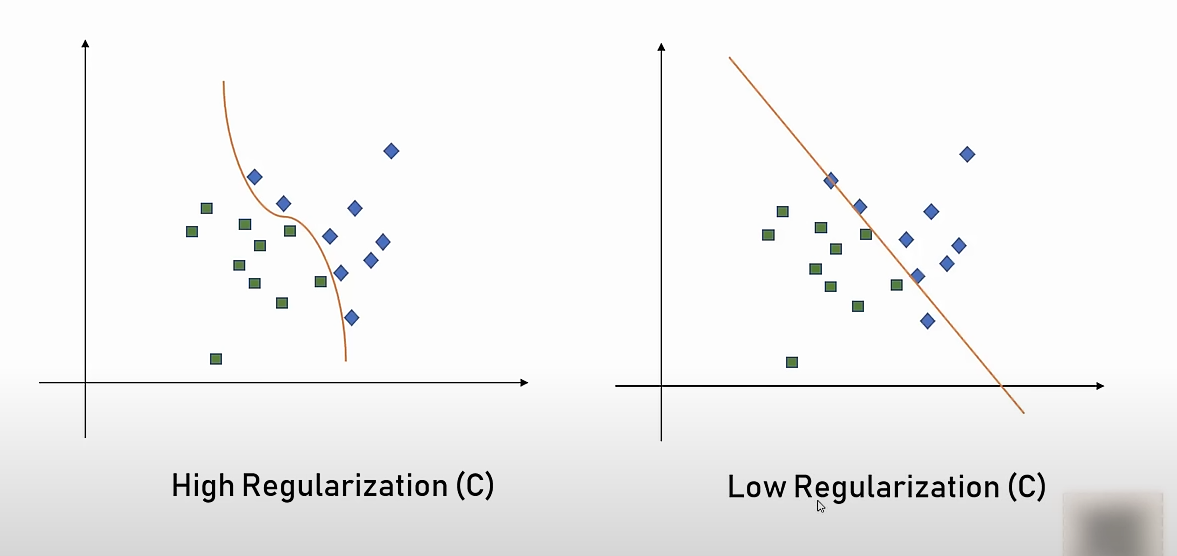
here with low regularization you might get some errors but it wont overfit the model
because the high regularization will make a zigzag line


In [13]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
df['target'] = iris.target

In [19]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [20]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
import matplotlib.pyplot as plt

df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [22]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


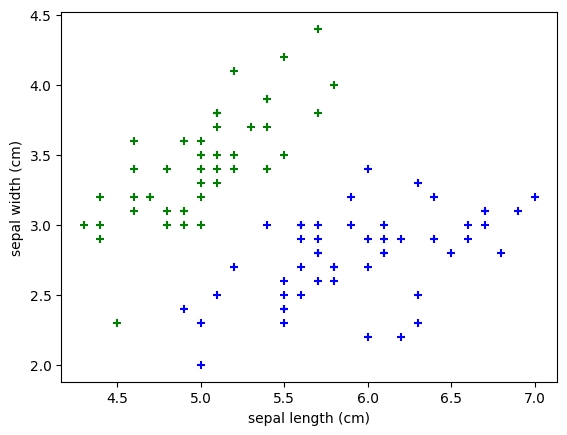

In [30]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')
# plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='+')

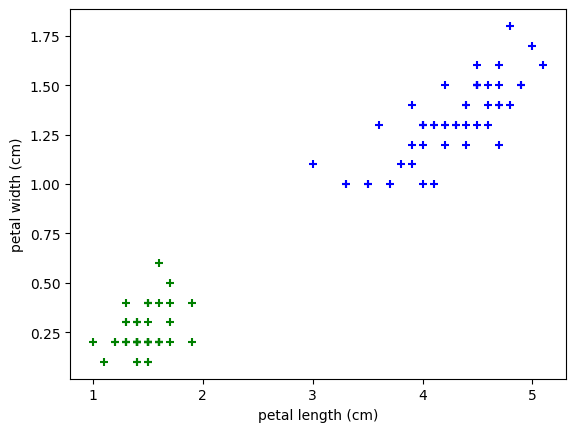

In [31]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='+')
# plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker='+')

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','flower_name'],axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [47]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [48]:
model.score(X_test,y_test)

1.0